<a href="https://colab.research.google.com/github/ajitkumarkp/ML/blob/master/CNN_Improve_Training_Co2As2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Improving CNN Training

This assignment is aimed at reinforcing your knowledge about the training process for a CNN. Given below is the task:

### <font color="green">Situation</font>
**We have given the code for training a CNN using the SGD optimizer. On running the training for 5 epochs we found that the Training accuracy we get is only 10%.**

### <font color="green">Your Task</font>
Your task is to improve the overall training process, so that we get higher Training accuracy. You can change any parameter you may find suitable ( we have provided some hints in Section 4. ). 

**Only Section 4 is the place where you need to make changes.**

The distribution of marks is as follows:
```
1. Training Accuracy > 30% - 5 marks
1. Training Accuracy > 50% - 10 marks
1. Training Accuracy > 65% - 15 marks
```

P.S. We were able to achieve 68% Training accuracy by changing a few things from the current configuration.

#### <font color="red">NOTE: You can also download the NB and run your experiments on Google Colab or Kaggle and when you think you have got the solution, you can add the code in section 4 and submit.</font>

### <font color="green">The assignment carries 30 marks and you will have a total of 5 attempts. The grading will be done manually.</font>

## 1. Import necessary modules

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
# set random seed
np.random.seed(2020)

## 2. Load Dataset

In [4]:
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Training data shape
train_images_shape = train_images.shape
# Training labels shape
train_labels_shape = train_labels.shape

print('Training data shape: ', train_images_shape, train_labels_shape)

# Testing data shape
test_images_shape = test_images.shape
# Testing labels shape
test_labels_shape = test_labels.shape

print('Testing data shape: ', test_images_shape, test_labels_shape)

170500096/170498071 [==============================] - 4s 0us/step
Training data shape:  (50000, 32, 32, 3) (50000, 1)
Testing data shape:  (10000, 32, 32, 3) (10000, 1)


## 3. Preprocessing

(32, 32, 3)
[6]


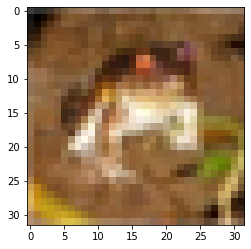

In [16]:
from tensorflow.keras.utils import to_categorical
# Change to float datatype
train_data = train_images.astype('float32')
test_data = test_images.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# print(train_data[0].shape)
# plt.imshow(train_data[0])
# print(train_labels[0])

## <font color="red">4. TODO</font>

Currently, the model and optimizer is configured such that it gives very low accuracy ~10%. Your task is to explore options by modifying model and optimizer to get to more than 65% Training accuracy.

Here are a few hints of what changes can help increase the accuracy in just 5 epochs:
1. Changing the Model parameters like **`activation`** type, **`droupout`** ratio etc.
1. Changing the **`optimizer`**
1. Changing **`optimizer parameters`**

## <font color="red">4.1. Model Architecture</font>

In [0]:
def createModel():
    model = Sequential()

    # feature extraction part
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.15))

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.15))

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.15))

    # classification part
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    return model

## <font color="red">4.2. Configure Optimizer</font>

In [0]:
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop

# optim = SGD(lr=0.0001)
# optim = RMSprop(lr=0.001)
optim = Adam()

## 5. Train Model
The model training runs for 5 epochs and the training/testing accuracy is printed along with every iteration.

You should achieve as high accuracy as possible within 5 epochs by changing parameters as mentioned above.

**Tip:** You can make out from the first 2-3 epochs if it is going in the correct direction. You dont need to to wait for 5 epochs if you think it is not going to work. 

#### <font color="red">NOTE: You can also download the NB and run your experiments on Google Colab or Kaggle and when you think you have got the solution, you can add the code in section 4 and submit.</font>


In [62]:
model = createModel()
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, epochs=5, batch_size=64, validation_data=(test_data, test_labels_one_hot), verbose=1, shuffle=False)

Epoch 1/5
782/782 [==============================] - 13s 16ms/step - loss: 1.6357 - accuracy: 0.3863 - val_loss: 1.3024 - val_accuracy: 0.5182
Epoch 2/5
782/782 [==============================] - 12s 16ms/step - loss: 1.1991 - accuracy: 0.5705 - val_loss: 1.0490 - val_accuracy: 0.6234
Epoch 3/5
782/782 [==============================] - 12s 16ms/step - loss: 1.0183 - accuracy: 0.6381 - val_loss: 0.9325 - val_accuracy: 0.6692
Epoch 4/5
782/782 [==============================] - 12s 16ms/step - loss: 0.9029 - accuracy: 0.6817 - val_loss: 0.8544 - val_accuracy: 0.7025
Epoch 5/5
782/782 [==============================] - 12s 16ms/step - loss: 0.8220 - accuracy: 0.7114 - val_loss: 0.7775 - val_accuracy: 0.7306


## 6. Plot Training and Validation Loss and Classification Accuracy

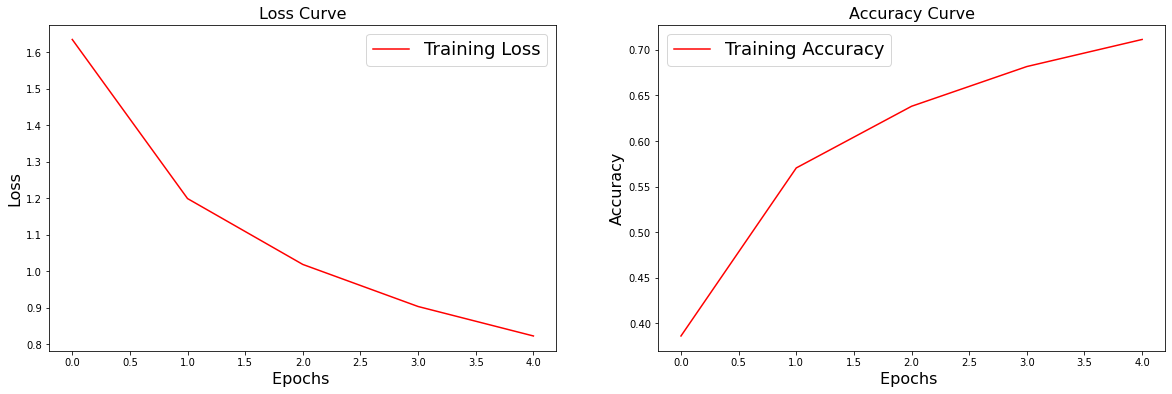

In [64]:
plt.figure(figsize=[20,6])
# plot loss
plt.subplot(121)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='red', label='train')
plt.legend(['Training Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curve',fontsize=16)
# plot accuracy
plt.subplot(122)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='red', label='train')
plt.legend(['Training Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curve',fontsize=16)
plt.show()